In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
automobile_df = pd.read_csv('auto-mpg-processed.csv')

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,6,250.0,78,3574,21.0,44
1,19.0,6,232.0,100,2634,13.0,49
2,39.0,4,86.0,64,1875,16.4,39
3,29.0,4,68.0,49,1867,19.5,47
4,34.7,4,105.0,63,2215,14.9,39


In [5]:
result_dict = {} #defining a results dictionary to store results of our models

In [6]:
def build_model(regression_fn,
               name_of_y_col,
               name_of_x_cols,
               dataset,
               test_frac = 0.2,
               preprocess_fn=None,
               show_plot_y = False,
               show_plot_scatter = False):
    
    X = dataset[name_of_x_cols]
    y = dataset[name_of_y_col]
    
    if preprocess_fn is not None:
        X = preprocess_fn(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_frac)
    
    model = regression_fn(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
    print 'Training score: ', model.score(X_train, y_train)
    print 'Testing score: ', r2_score(y_test, y_pred)
    
    if show_plot_y == True:
        fig, ax = plt.subplots(figsize = (12,8))
        
        plt.plot(y_pred, label = 'Predicted')
        plt.plot(y_test.values, label = 'Actual')
        
        plt.ylabel(name_of_y_col)
        plt.legend()
        plt.show()
        
    if show_plot_scatter == True:
        fig, ax = plt.subplots(figsize = (12,8))
        
        plt.scatter(X_test, y_test)
        plt.plot(X_test, y_pred, 'r')
        
        plt.legend(['Predicted Line', 'Observed Data'])
        plt.show()
        
    return {'Training score': model.score(X_train, y_train),
        'Testing score': r2_score(y_test, y_pred)}
        

In [7]:
def compare_results():
    for key in result_dict:
        print 'Regression: ', key
        
        print ' '
        print 'Training score', result_dict[key]['Training score']
        print 'Test data', result_dict[key]['Testing score']
        print ' '

In [8]:
#Simple Linear Regression
def linear_reg(X_train, y_train):
    model= LinearRegression(normalize= True)
    model.fit(X_train, y_train)
    
    return model

Training score:  0.7021013578789035
Testing score:  0.6431922301441477


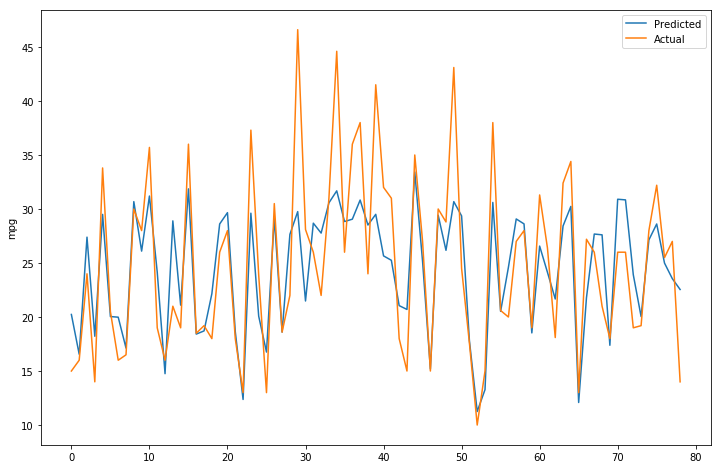

In [9]:
result_dict['mpg ~ single_linear'] = build_model(linear_reg, 'mpg', ['weight'], automobile_df, show_plot_y = True)

In [10]:
result_dict

{'mpg ~ single_linear': {'Testing score': 0.6431922301441477,
  'Training score': 0.7021013578789035}}

Training score:  0.7052380533818474
Testing score:  0.708986123535474


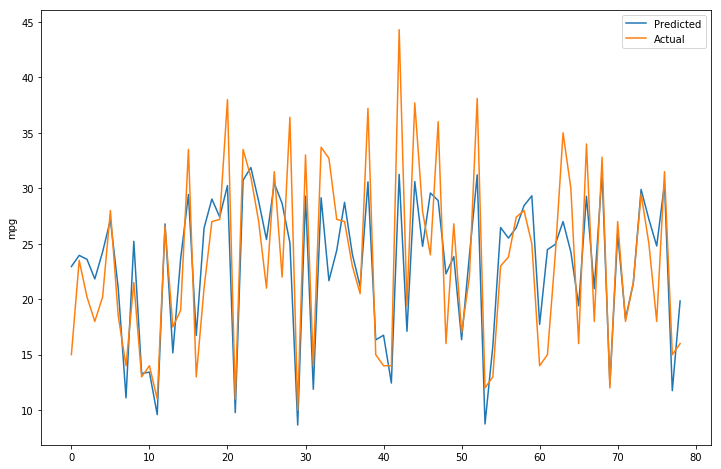

In [11]:
result_dict['mpg ~ kitchen_sink_linear'] = build_model(linear_reg, 'mpg',
                                                       ['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders'], automobile_df, show_plot_y = True)

In [12]:
 result_dict

{'mpg ~ kitchen_sink_linear': {'Testing score': 0.708986123535474,
  'Training score': 0.7052380533818474},
 'mpg ~ single_linear': {'Testing score': 0.6431922301441477,
  'Training score': 0.7021013578789035}}

Training score:  0.7086126885172328
Testing score:  0.6912727935945504


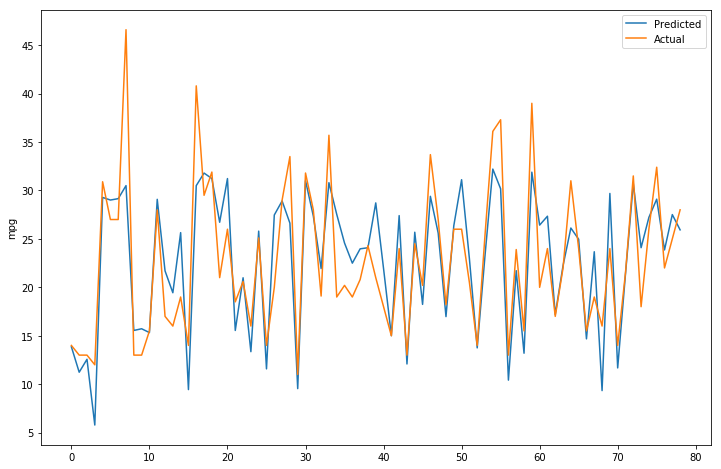

In [13]:
result_dict['mpg ~ parsimonius_linear'] = build_model(linear_reg, 'mpg',
                                                       ['horsepower', 'weight'], automobile_df, show_plot_y = True)

In [14]:
result_dict

{'mpg ~ kitchen_sink_linear': {'Testing score': 0.708986123535474,
  'Training score': 0.7052380533818474},
 'mpg ~ parsimonius_linear': {'Testing score': 0.6912727935945504,
  'Training score': 0.7086126885172328},
 'mpg ~ single_linear': {'Testing score': 0.6431922301441477,
  'Training score': 0.7021013578789035}}

In [15]:
compare_results()

Regression:  mpg ~ kitchen_sink_linear
 
Training score 0.7052380533818474
Test data 0.708986123535474
 
Regression:  mpg ~ single_linear
 
Training score 0.7021013578789035
Test data 0.6431922301441477
 
Regression:  mpg ~ parsimonius_linear
 
Training score 0.7086126885172328
Test data 0.6912727935945504
 


In [16]:
#Lasso Regression
def lasso_reg(X_train, y_train, alpha=0.5):
    model= Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    
    return model

Training score:  0.6905217849829466
Testing score:  0.7582360024413819


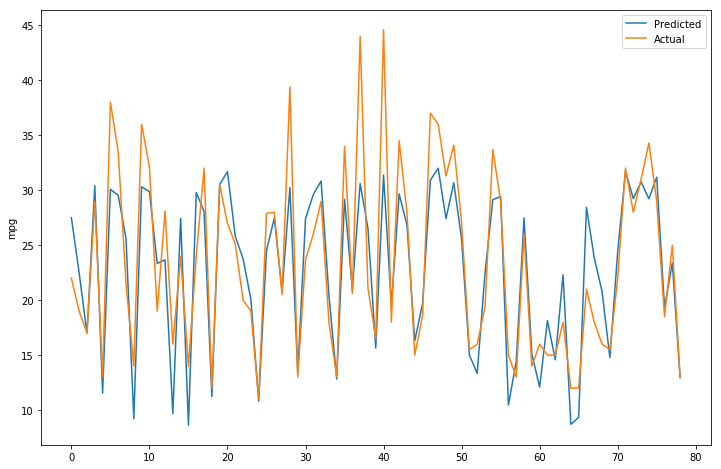

In [17]:
result_dict['mpg ~ kitchen_sink_lasso'] = build_model(lasso_reg, 'mpg',
                                                       ['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders'], automobile_df, show_plot_y = True)

In [18]:
compare_results()

Regression:  mpg ~ kitchen_sink_linear
 
Training score 0.7052380533818474
Test data 0.708986123535474
 
Regression:  mpg ~ single_linear
 
Training score 0.7021013578789035
Test data 0.6431922301441477
 
Regression:  mpg ~ kitchen_sink_lasso
 
Training score 0.6905217849829466
Test data 0.7582360024413819
 
Regression:  mpg ~ parsimonius_linear
 
Training score 0.7086126885172328
Test data 0.6912727935945504
 


In [19]:
#Ridge Regression Model
def ridge_reg(X_train, y_train, alpha=0.5, normalize=True):
    model= Lasso(alpha=alpha, normalize=normalize)
    model.fit(X_train, y_train)
    
    return model

Training score:  0.0
Testing score:  -0.02450532517265125


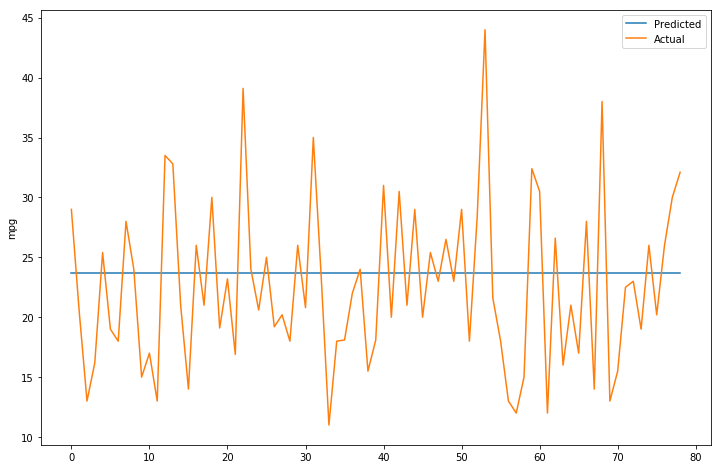

In [35]:
result_dict['mpg ~ kitchen_sink_ridge'] = build_model(ridge_reg, 'mpg',
                                                       ['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders'], automobile_df, show_plot_y = True)

In [20]:
compare_results()

Regression:  mpg ~ kitchen_sink_linear
 
Training score 0.7052380533818474
Test data 0.708986123535474
 
Regression:  mpg ~ single_linear
 
Training score 0.7021013578789035
Test data 0.6431922301441477
 
Regression:  mpg ~ kitchen_sink_lasso
 
Training score 0.6905217849829466
Test data 0.7582360024413819
 
Regression:  mpg ~ parsimonius_linear
 
Training score 0.7086126885172328
Test data 0.6912727935945504
 


In [21]:
#Elastic Regression Model
def elastic_net_reg(X_train, y_train, alpha=1, l1_ratio=0.5,
                    normalize=False, max_iter= 100000, warm_start= True, equivalent_to="ElasticNet"):
    
    print "Equivalent to:", equivalent_to
    
    model= ElasticNet(alpha=alpha, l1_ratio= l1_ratio, normalize=normalize, max_iter=max_iter,warm_start=warm_start)
    model.fit(X_train, y_train)
    
    return model

In [22]:
from functools import partial

Equivalent to: OLS
Training score:  0.7060912766142137
Testing score:  0.7116456199261636


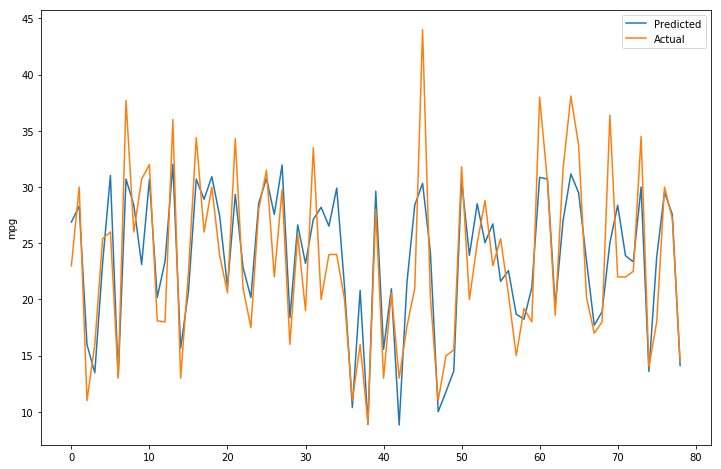

In [23]:
result_dict['mpg ~ kitchen_sink_elastic_net_ols'] = build_model(partial(elastic_net_reg, alpha=0, equivalent_to='OLS'),
                                                                'mpg',
                                                       ['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders'], automobile_df, show_plot_y = True)

Equivalent to: Lasso
Training score:  0.7119112593306286
Testing score:  0.6858282037068565


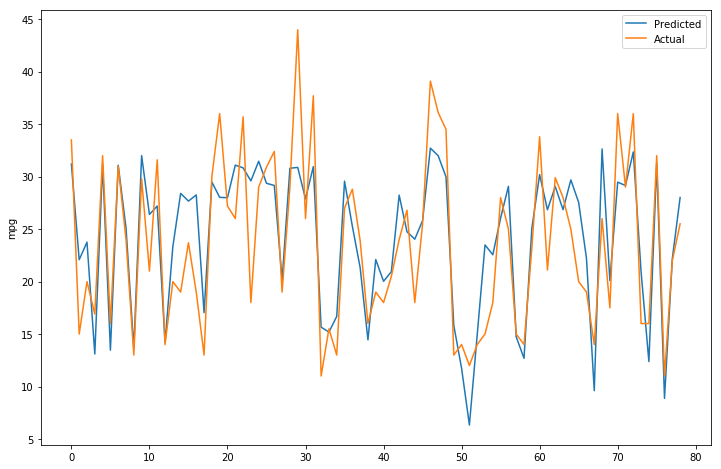

In [24]:
result_dict['mpg ~ kitchen_sink_elastic_net_lasso'] = build_model(partial(elastic_net_reg, alpha=1, l1_ratio= 1, equivalent_to='Lasso'),
                                                                'mpg',
                                                       ['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders'], automobile_df, show_plot_y = True)

Equivalent to: Ridge
Training score:  0.7008412996554845
Testing score:  0.7268287628666945


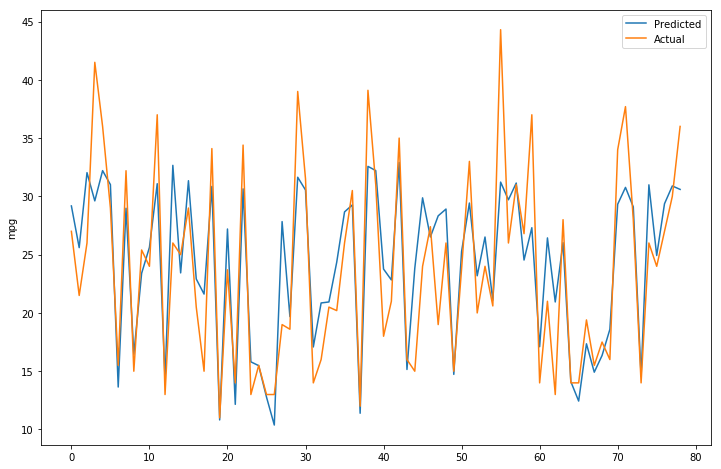

In [25]:
result_dict['mpg ~ kitchen_sink_elastic_net_ridge'] = build_model(partial(elastic_net_reg, alpha=1, l1_ratio=0, equivalent_to='Ridge'),
                                                                'mpg',
                                                       ['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders'], automobile_df, show_plot_y = True)

Equivalent to: ElasticNet
Training score:  0.7121193448496421
Testing score:  0.6611577452116704


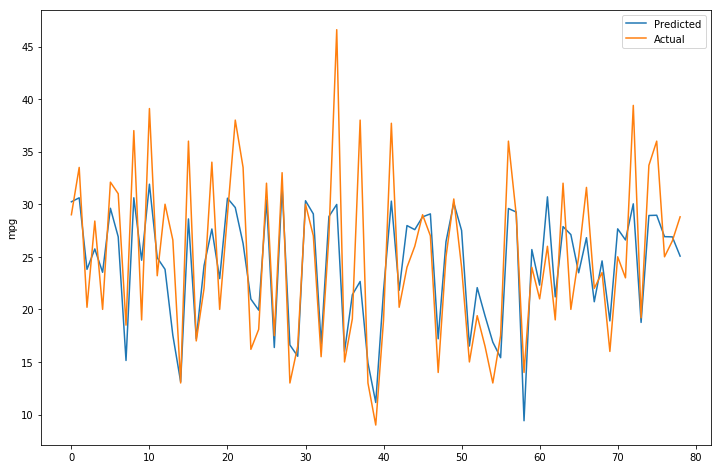

In [26]:
result_dict['mpg ~ kitchen_sink_elastic_net'] = build_model(partial(elastic_net_reg, alpha=1, l1_ratio=0.5),
                                                                'mpg',
                                                       ['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders'], automobile_df, show_plot_y = True)

In [27]:
compare_results()

Regression:  mpg ~ kitchen_sink_elastic_net
 
Training score 0.7121193448496421
Test data 0.6611577452116704
 
Regression:  mpg ~ kitchen_sink_elastic_net_ridge
 
Training score 0.7008412996554845
Test data 0.7268287628666945
 
Regression:  mpg ~ kitchen_sink_lasso
 
Training score 0.6905217849829466
Test data 0.7582360024413819
 
Regression:  mpg ~ single_linear
 
Training score 0.7021013578789035
Test data 0.6431922301441477
 
Regression:  mpg ~ kitchen_sink_elastic_net_ols
 
Training score 0.7060912766142137
Test data 0.7116456199261636
 
Regression:  mpg ~ parsimonius_linear
 
Training score 0.7086126885172328
Test data 0.6912727935945504
 
Regression:  mpg ~ kitchen_sink_linear
 
Training score 0.7052380533818474
Test data 0.708986123535474
 
Regression:  mpg ~ kitchen_sink_elastic_net_lasso
 
Training score 0.7119112593306286
Test data 0.6858282037068565
 


In [28]:
#SVM Regression Model
def svr_reg(X_train, y_train, kernel='linear', epsilon=0.05,
                    C=0.3):
    
    model= SVR(kernel=kernel, epsilon=epsilon,C=C)
    model.fit(X_train, y_train)
    
    return model

Training score:  0.698587689290104
Testing score:  0.6970726147842997


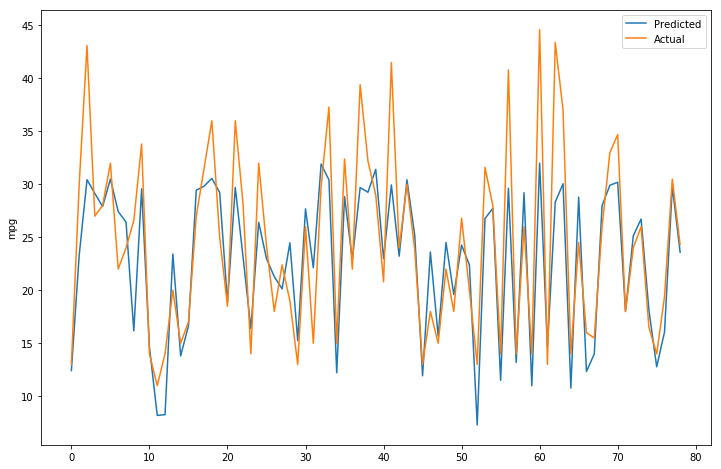

In [29]:
result_dict['mpg ~ kitchen_sink_svr'] = build_model(svr_reg,
                                                                'mpg',
                                                       ['displacement', 
                                                        'horsepower', 
                                                        'weight', 
                                                        'acceleration', 
                                                        'cylinders'], 
                                                    automobile_df, 
                                                    show_plot_y = True)

In [30]:
compare_results()

Regression:  mpg ~ kitchen_sink_elastic_net
 
Training score 0.7121193448496421
Test data 0.6611577452116704
 
Regression:  mpg ~ kitchen_sink_elastic_net_ridge
 
Training score 0.7008412996554845
Test data 0.7268287628666945
 
Regression:  mpg ~ kitchen_sink_svr
 
Training score 0.698587689290104
Test data 0.6970726147842997
 
Regression:  mpg ~ kitchen_sink_lasso
 
Training score 0.6905217849829466
Test data 0.7582360024413819
 
Regression:  mpg ~ single_linear
 
Training score 0.7021013578789035
Test data 0.6431922301441477
 
Regression:  mpg ~ kitchen_sink_elastic_net_ols
 
Training score 0.7060912766142137
Test data 0.7116456199261636
 
Regression:  mpg ~ parsimonius_linear
 
Training score 0.7086126885172328
Test data 0.6912727935945504
 
Regression:  mpg ~ kitchen_sink_linear
 
Training score 0.7052380533818474
Test data 0.708986123535474
 
Regression:  mpg ~ kitchen_sink_elastic_net_lasso
 
Training score 0.7119112593306286
Test data 0.6858282037068565
 


In [32]:
#Nearest Neighbors Regression Model
def kneighbors_reg(X_train, y_train, n_neighbors=10):
    
    model= KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    
    return model

Training score:  0.7515563301509153
Testing score:  0.7688657457416368


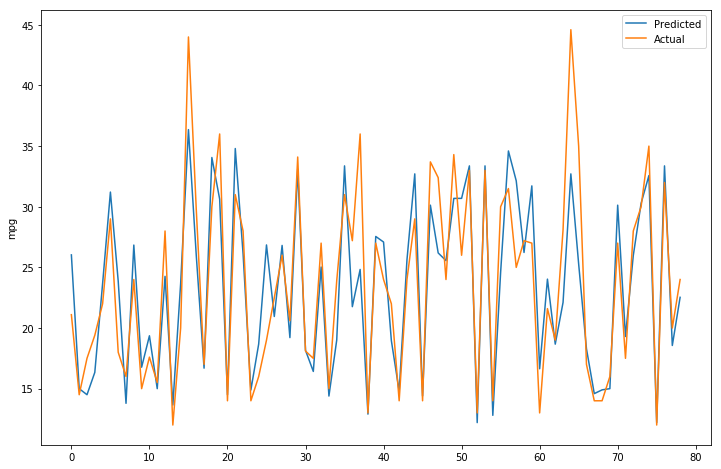

In [33]:
result_dict['mpg ~ kitchen_sink_kneighbors'] = build_model(kneighbors_reg,
                                                                'mpg',
                                                       ['displacement', 
                                                        'horsepower', 
                                                        'weight', 
                                                        'acceleration', 
                                                        'cylinders'], 
                                                    automobile_df, 
                                                    show_plot_y = True)

In [34]:
compare_results()

Regression:  mpg ~ kitchen_sink_elastic_net
 
Training score 0.7121193448496421
Test data 0.6611577452116704
 
Regression:  mpg ~ kitchen_sink_kneighbors
 
Training score 0.7515563301509153
Test data 0.7688657457416368
 
Regression:  mpg ~ kitchen_sink_elastic_net_ridge
 
Training score 0.7008412996554845
Test data 0.7268287628666945
 
Regression:  mpg ~ kitchen_sink_svr
 
Training score 0.698587689290104
Test data 0.6970726147842997
 
Regression:  mpg ~ kitchen_sink_lasso
 
Training score 0.6905217849829466
Test data 0.7582360024413819
 
Regression:  mpg ~ single_linear
 
Training score 0.7021013578789035
Test data 0.6431922301441477
 
Regression:  mpg ~ kitchen_sink_elastic_net_ols
 
Training score 0.7060912766142137
Test data 0.7116456199261636
 
Regression:  mpg ~ parsimonius_linear
 
Training score 0.7086126885172328
Test data 0.6912727935945504
 
Regression:  mpg ~ kitchen_sink_linear
 
Training score 0.7052380533818474
Test data 0.708986123535474
 
Regression:  mpg ~ kitchen_sin

In [35]:
#SGD Regression Model
#Scaling and standardizing our dataset
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)
    
    return scaler.transform(x)

In [36]:
def sgd_reg(X_train, y_train, max_iter=10000, tol=1e-3):
    
    model= SGDRegressor(max_iter=max_iter,tol=tol)
    model.fit(X_train, y_train)
    
    return model

Training score:  0.7141563407648855
Testing score:  0.6654517714070793


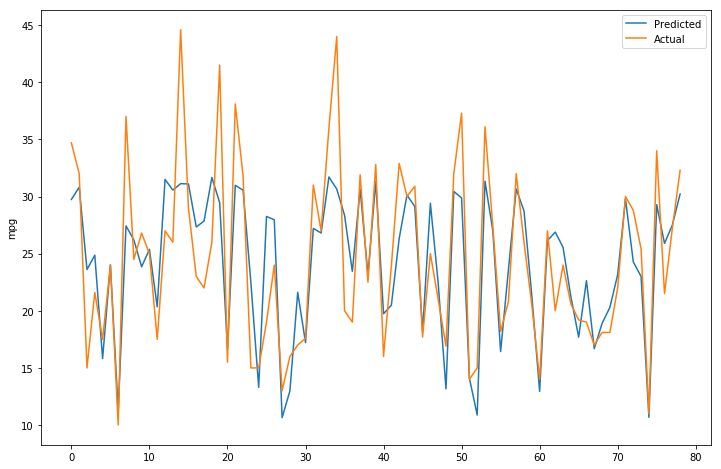

In [38]:
result_dict['mpg ~ kitchen_sink_sgd'] = build_model(sgd_reg,
                                                                'mpg',
                                                       ['displacement', 
                                                        'horsepower', 
                                                        'weight', 
                                                        'acceleration', 
                                                        'cylinders'], 
                                                    automobile_df, 
                                                    show_plot_y = True,
                                                   preprocess_fn=apply_standard_scaler)

In [39]:
#Decision Tree Regression Model
def decision_tree_reg(X_train, y_train, max_depth=2):
    
    model= DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    return model

Training score:  0.7483205724601412
Testing score:  0.6237011488377335


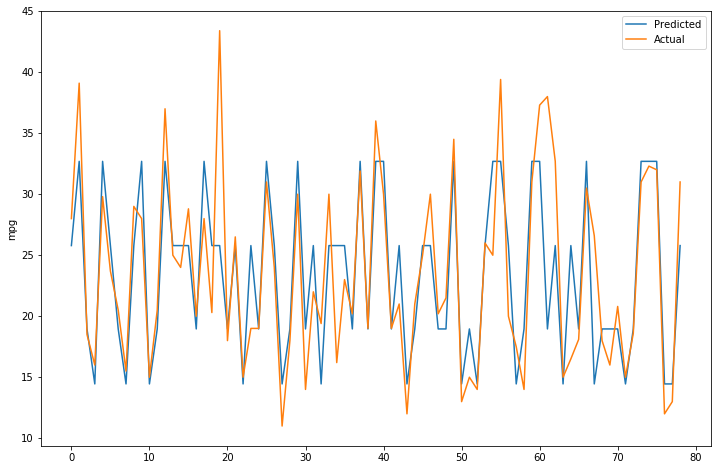

In [40]:
result_dict['mpg ~ kitchen_sink_decision_tree'] = build_model(decision_tree_reg,
                                                                'mpg',
                                                       ['displacement', 
                                                        'horsepower', 
                                                        'weight', 
                                                        'acceleration', 
                                                        'cylinders'], 
                                                    automobile_df, 
                                                    show_plot_y = True)

In [41]:
#Least Angle Regression Model
def lars_reg(X_train, y_train, n_nonzero_coefs=4):
    
    model= Lars(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(X_train, y_train)
    
    return model

Training score:  0.701548755744057
Testing score:  0.7267915319601843


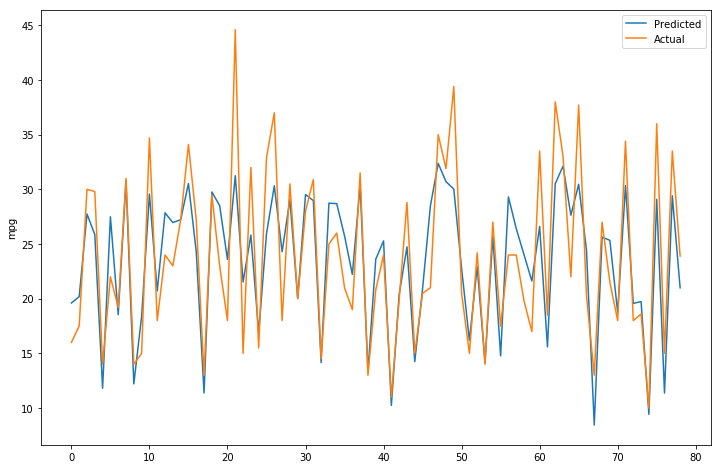

In [42]:
result_dict['mpg ~ kitchen_sink_lars'] = build_model(lars_reg,
                                                                'mpg',
                                                       ['displacement', 
                                                        'horsepower', 
                                                        'weight', 
                                                        'acceleration', 
                                                        'cylinders'], 
                                                    automobile_df, 
                                                    show_plot_y = True)

In [43]:
compare_results()

Regression:  mpg ~ kitchen_sink_elastic_net
 
Training score 0.7121193448496421
Test data 0.6611577452116704
 
Regression:  mpg ~ kitchen_sink_decision_tree
 
Training score 0.7483205724601412
Test data 0.6237011488377335
 
Regression:  mpg ~ kitchen_sink_kneighbors
 
Training score 0.7515563301509153
Test data 0.7688657457416368
 
Regression:  mpg ~ kitchen_sink_elastic_net_ridge
 
Training score 0.7008412996554845
Test data 0.7268287628666945
 
Regression:  mpg ~ kitchen_sink_svr
 
Training score 0.698587689290104
Test data 0.6970726147842997
 
Regression:  mpg ~ kitchen_sink_lasso
 
Training score 0.6905217849829466
Test data 0.7582360024413819
 
Regression:  mpg ~ kitchen_sink_sgd
 
Training score 0.7141563407648855
Test data 0.6654517714070793
 
Regression:  mpg ~ single_linear
 
Training score 0.7021013578789035
Test data 0.6431922301441477
 
Regression:  mpg ~ kitchen_sink_elastic_net_ols
 
Training score 0.7060912766142137
Test data 0.7116456199261636
 
Regression:  mpg ~ parsi